In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Proyecto evaluativo - Curso de Data Science I

###Parte I

##Abstract

Este proyecto profundiza en un conjunto de datos sobre 5,000 clientes de una empresa telefónica, con 18 variables, entre las cuales se incluye si abandonaron el servicio o no. Creemos que estas variables pueden ofrecernos conocimiento sobre las posibles causas del abandono. Con este conocimiento buscamos poder crear un modelo predictor del abandono con el cual podamos luego realizar acciones de recaptura de aquellos clientes que consideramos pueden estar en riesgo de abandonar el servicio.

El conjunto de datos incluye:

* **churn** (categórico): Indica si un cliente abandonó (True) o permaneció (False) en la empresa telefónica.
* **accountlength** (numérico): Antigüedad de la cuenta del cliente (potencialmente influye en el riesgo de abandono). Para finel analíticos vamos a asumir que es en días.
* **internationalplan** (categórico): Presencia de un plan de llamadas internacionales.
* **voicemailplan** (categórico): Presencia de un plan de correo de voz.
* **numbervmailmessages** (numérico): Número de mensajes de correo de voz recibidos.
* **Variables de llamadas y minutos** (numérico): Total de minutos y llamadas realizadas durante el día, la noche y la tarde. Los nombres de las variables son: totaldayminutes, totaldaycalls, totaleveminutes, totalevecalls, totalnightminutes, totalnightcalls, totalintlminutes y totalintlcalls.
* **Variables de cargos** (numérico): Cargos totales en dolares por llamadas diurnas, nocturnas y vespertinas, así como por llamadas internacionales. Los nombres de las variables son: totaldaycharge, totalevecharge, totalnightcharge y totalintlcharge
* **numbercustomerservicecalls** (numérico): Número de llamadas realizadas al servicio de atención al cliente (potencialmente relacionado con la insatisfacción o las necesidades de solución de problemas).

Si bien la fuente original (repositorio de datos UCI https://www.sgi.com/tech/mlc/db/) se ha modificado para este análisis (excluyendo el código de área y el número de teléfono), esta base proporciona una representación realista de los datos de los clientes de telecomunicaciones.

## Preguntas de investigación e hipótesis

1. ¿Qué factores son los más influyentes en el abandono de clientes?
2. ¿Algunos segmentos específicos de clientes exhiben tasas de abandono más altas?
3. ¿Podemos crear un modelo predictor del abandono?

Hipotetizamos que la antigüedad de la cuenta, los planes internacionales/de correo de voz, los patrones de uso (llamadas, minutos), los cargos totales y la frecuencia de las llamadas al servicio de atención al cliente podrían asociarse con el abandono del cliente del servicio.


## Exploración inicial de la base

Con el siguiente chunk de código llamamos la base desde nuestro repositorio y visualizamos la cabeza de la base, para tener una vista general con lo que estamos trabajando.

In [10]:
url = 'https://raw.githubusercontent.com/rociosantar/CoderHouse/refs/heads/main/churn.csv'
customer_churn = pd.read_csv(url)
customer_churn.head()  # Display first few rows

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,False,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,False,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,False,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,False,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,False,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


El segundo análisis basico que le realizamos en el "describe" que nos permite ver una "descripcion" basica de las variables numéricas, con elementos como el valor mínimo, máximo, promedio y percentiles.

In [11]:
customer_churn.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Tambien revisamos que no tenga valores nulos que puedan afectar nuestro futuro algoritmo.

In [12]:
customer_churn.isnull().sum()

,0
churn,0
accountlength,0
internationalplan,0
voicemailplan,0
numbervmailmessages,0
totaldayminutes,0
totaldaycalls,0
totaldaycharge,0
totaleveminutes,0
totalevecalls,0


###Distribución de la variable de abandono o "churn".

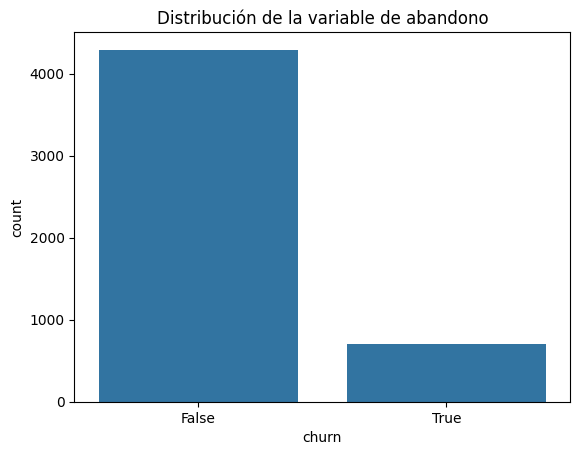

In [13]:
sns.countplot(x="churn", data=customer_churn)
plt.title("Distribución de la variable de abandono")
plt.show()

Primero analizamos la relación entre el abandono y antigüedad de la cuenta del cliente. Probamos diferentes formas de visualizar la relación y en ninguna encontramos una ralacion significativa visualmente. Elegimos dejar para el trabajo el diagrama de caja ya que en el podemos visualizar que la distribución entre las personas que tienen y no tienen cuenta parece no tener relación fuerte con la cantidad de días de antiguedad de dicha cuenta.

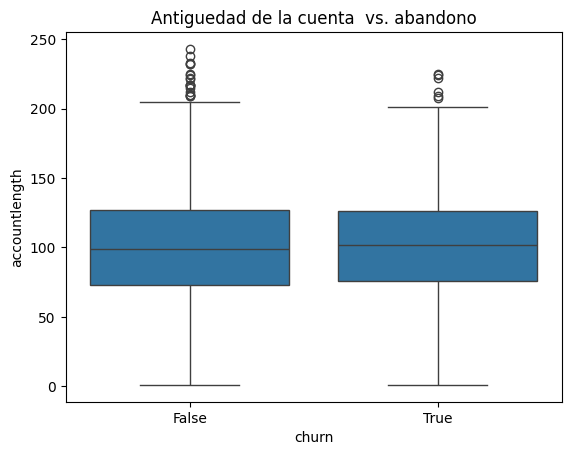

In [14]:
# Account Length vs. Churn (scatterplot)
sns.boxplot(x="churn", y="accountlength", data=customer_churn)
plt.title("Antiguedad de la cuenta  vs. abandono")
plt.show()


Luego analizamos la relación entre el abandono y los minutos de llamada por día. Utilizamos el grafico de caja ya que nos permite ver una clara diferencia entre los datos, expresada principalmente en la media y los percentiles. Como vemos abajo, independientemente de la cantidad de casos que tienen los grupos, que la media y los percentiles sean tan diferentes entre si nos habla de una relación fuerte entre las variables.

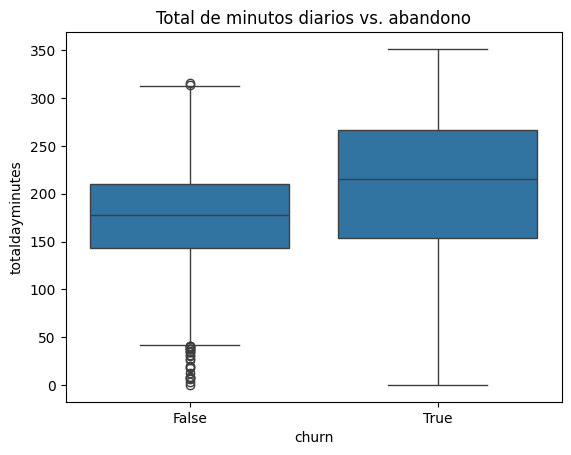

In [15]:
# Usage vs. Churn (Boxplot)
sns.boxplot(x="churn", y="totaldayminutes", data=customer_churn)
plt.title("Total de minutos diarios vs. abandono")
plt.show()

Luego analizamos la relación entre el cargo del servicio y el abandono. Y tambien vemos una diferencia importante. Para aquellos clientes que abandonaron el servicio la tarifa es más variable (la concetracion de los datos se da en dos "montañas") y con una media más alta. Esto da la pauta que podría ser interesante tratar de entender un poco más sobre esta relacion para ver si podemos usarla en nuetro modelo predictor.

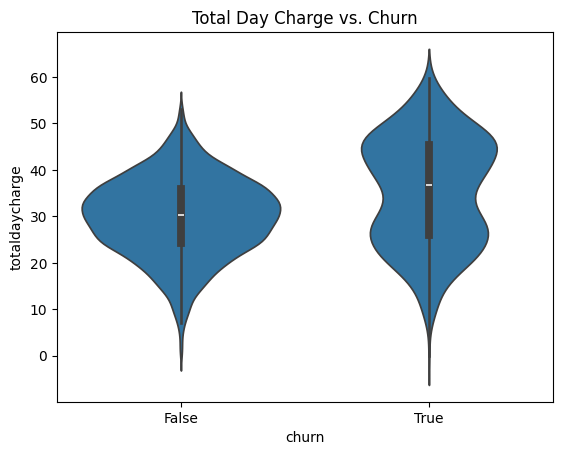

In [16]:
# Charges vs. Churn (Violin Plot)
sns.violinplot(x="churn", y="totaldaycharge", data=customer_churn)
plt.title("Total cargo diario vs. abandono")
plt.show()

Por ultimo, analizamos las llamadas al servicio al consumidor y vemos como claramente aquellos usuarios que abandonaron el servicio tuvieron mayores llamadas al servicio al consumidor.

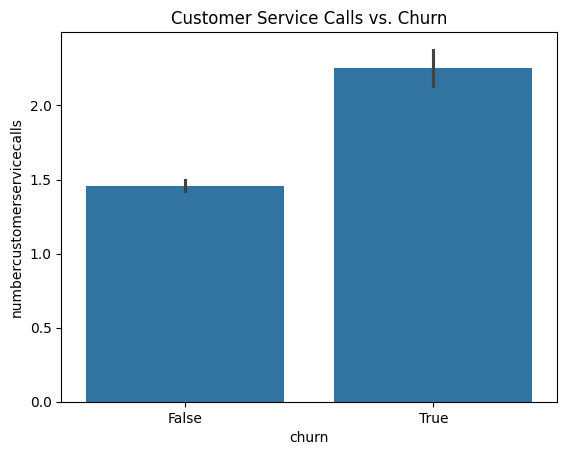

In [19]:
# Customer Service Calls vs. Churn (Scatterplot)
sns.barplot(x="churn", y="numbercustomerservicecalls", data=customer_churn)
plt.title("Llamadas al servicio al consumidor vs. abandono")
plt.show()